In [3]:
import tensorflow as tf
import math
from tensorflow import keras
from keras import layers
import numpy as np

In [4]:
# Set the path to your dataset
train_dir = 'C:/Users/Law Li Zhe/Desktop/Processed_Split/Processed_Split/train'
val_dir = 'C:/Users/Law Li Zhe/Desktop/Processed_Split/Processed_Split/val'
test_dir = 'C:/Users/Law Li Zhe/Desktop/Processed_Split/Processed_Split/test'

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(train_dir, labels='inferred', image_size=(100, 100), batch_size=32,color_mode='grayscale'
)
data_val = tf.keras.utils.image_dataset_from_directory(val_dir, labels='inferred', image_size=(100, 100), batch_size=32, color_mode='grayscale'
)
data_test = tf.keras.utils.image_dataset_from_directory(test_dir, labels='inferred', image_size=(100, 100), batch_size=32, color_mode='grayscale'
)

Found 45828 files belonging to 50 classes.
Found 9438 files belonging to 50 classes.
Found 9504 files belonging to 50 classes.


In [8]:
num_classes = 50

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(50, activation='softmax')
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics="accuracy")


"model.compile(loss='sparse_categorical_crossentropy',\n              optimizer=Adam(lr=1e-5), \n              metrics=['accuracy'])"

In [9]:
log = model.fit(x=data_train,
          epochs=5,
          validation_data=data_val)

Epoch 1/5
1433/1433 [==============================] - 321s 223ms/step - loss: 0.8350 - accuracy: 0.7733 - val_loss: 0.4832 - val_accuracy: 0.8522
Epoch 2/5
1433/1433 [==============================] - 339s 237ms/step - loss: 0.3180 - accuracy: 0.8990 - val_loss: 0.4184 - val_accuracy: 0.8774
Epoch 3/5
1433/1433 [==============================] - 348s 243ms/step - loss: 0.2010 - accuracy: 0.9352 - val_loss: 0.3769 - val_accuracy: 0.8994
Epoch 4/5
1433/1433 [==============================] - 340s 237ms/step - loss: 0.1412 - accuracy: 0.9554 - val_loss: 0.4068 - val_accuracy: 0.9039
Epoch 5/5
1433/1433 [==============================] - 385s 269ms/step - loss: 0.1061 - accuracy: 0.9659 - val_loss: 0.5161 - val_accuracy: 0.8842


In [6]:
data_test = tf.keras.utils.image_dataset_from_directory(test_dir, labels='inferred', image_size=(100, 100), batch_size=32, shuffle=False, color_mode='grayscale')
data_test = data_test.map(lambda x, y: (x, y))

Found 9504 files belonging to 50 classes.


In [7]:
y_pred = model.predict(data_test)

297/297 [==============================] - 28s 91ms/step


In [10]:
y_hat = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in data_test], axis=0)

In [13]:
import os
from sklearn.metrics import classification_report
print(classification_report(y_true, y_hat, digits=4, target_names=sorted(os.listdir(test_dir))))

                                    precision    recall  f1-score   support

                 Amylax_triacantha     0.6667    0.5000    0.5714         4
           Aphanizomenon_flosaquae     0.9667    0.9133    0.9392      1049
       Aphanothece_paralleliformis     0.2500    0.2000    0.2222         5
                             Beads     1.0000    0.9500    0.9744        20
                      Centrales_sp     0.8163    0.5556    0.6612        72
             Ceratoneis_closterium     0.2857    0.5000    0.3636         8
                    Chaetoceros_sp     0.9424    0.6298    0.7550       208
             Chaetoceros_sp_single     0.8611    0.9394    0.8986        33
                    Chlorococcales     0.2069    0.4000    0.2727        15
                     Chroococcales     0.5714    0.3636    0.4444        22
                 Chroococcus_small     0.7639    0.8800    0.8178       125
                           Ciliata     0.6154    0.6486    0.6316        37
           

In [14]:
# Save model
model.save('phytoplankton_cnn.h5')

In [2]:
from keras.models import load_model
model = load_model('phytoplankton_cnn.h5')

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

num_classes = 50

# get the predicted probabilities and true labels
y_pred_prob = y_pred
y_true = y_true

# calculate the AUC score
auc_score = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')

# calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true, y_pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

Text(0, 0.5, 'AUC')

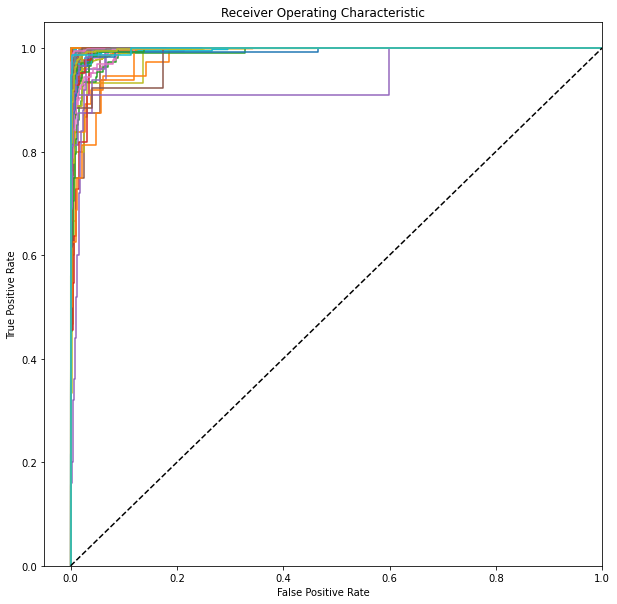

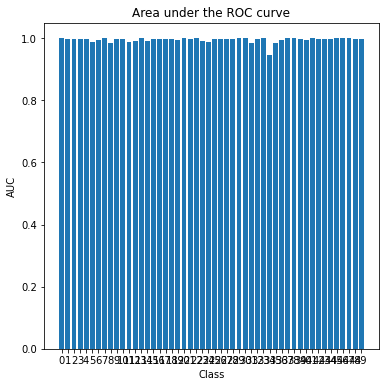

In [15]:
# plot the ROC curve for each class
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.legend(loc="lower right")

# plot the AUC curve
plt.figure(figsize=(6,6))
plt.title('Area under the ROC curve')
plt.bar(range(num_classes), roc_auc.values())
plt.xticks(range(num_classes), range(num_classes))
plt.xlabel('Class')
plt.ylabel('AUC')